In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [55]:
df_bike = pd.read_csv(r"https://raw.githubusercontent.com/Lingdoc83/Innopolis/refs/heads/main/Bike%20Prices.csv")
df_air = pd.read_excel(r"C:\Users\e.sytnik\Desktop\Обучение\Промежуточная\from Moscow.xlsx")

In [5]:
avv = df_bike['Ex_Showroom_Price'].mean()

In [7]:
df_bike['Ex_Showroom_Price'] = df_bike['Ex_Showroom_Price'].fillna(avv)

### Продолжаем работать с таблицей Bike

In [10]:
df_bike

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.000000
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.000000
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.000000
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.000000
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.000000
...,...,...,...,...,...,...,...,...
1056,Royal,Royal Enfield Electra 5 S,90000,2012,Individual,1st owner,40000,87958.714058
1057,Hero,Hero Honda Hunk,20000,2010,Individual,1st owner,17000,87958.714058
1058,Bajaj,Bajaj Pulsar 220 DTS-i,60000,2014,Individual,1st owner,16000,87958.714058
1059,Hero,Hero Honda CBZ extreme,40000,2009,Individual,1st owner,50000,87958.714058


In [12]:
# Посчитаем количество и суму по прайсу мотоциклов каждого бренда

In [14]:
sales = df_bike.groupby('Brand').agg({'Selling_Price':['sum', 'count']}).reset_index()
sales.columns = ['Brand', 'sum', 'count']

In [18]:
sales

,Brand,sum,count
0,Activa,102000,3
1,Aprilia,140000,2
2,BMW,300000,1
3,Bajaj,11697499,260
4,Benelli,160000,1
5,Harley,1080000,2
6,Hero,8028000,232
7,Honda,9162873,204
8,Hyosung,135000,1
9,Jawa,525000,3


### Столбчатая Диаграмма

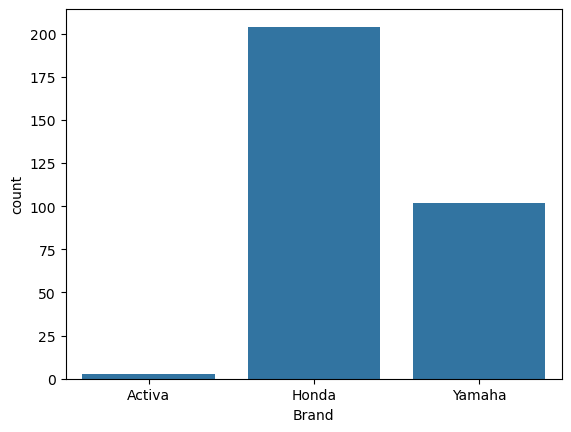

In [20]:
df_bike2 = sales[sales['Brand'].isin(["Activa", "Honda", "Yamaha"])]
sns.barplot(data = df_bike2, x = 'Brand', y = 'count')
plt.show()

In [ ]:
# Из графика мы узнали, что среди 3-х брендов мотоциклов в магазине болььше всего байуов бренда Honda, а меньше всего Activa

### Точечная диаграмма

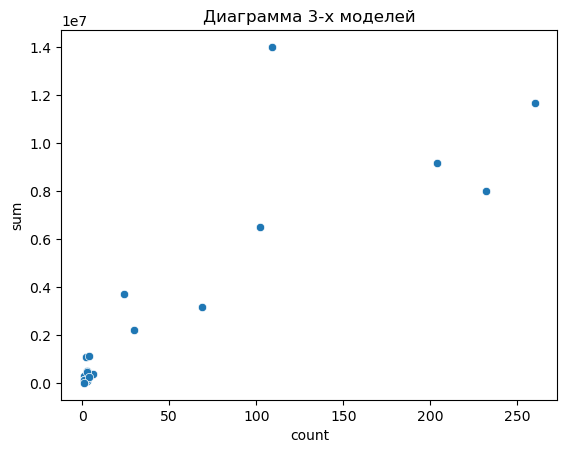

In [26]:
#df_bike2 = df_bike[df_bike['Brand'].isin(["TVS	", "Bajaj", "Jawa", "Kawasaki"])]
sns.scatterplot(data = sales, x = 'count', y = 'sum')
plt.title('Диаграмма 3-х моделей')
plt.show()

In [ ]:
# Как бы то смешно не казалось, но из графика можем сделать вывод, что чем больше количество байков продается, то выше их суммарная стоимость.

In [ ]:
# Но есть исключение - байки бренда Royal при своем количистве 109 штук дороже байков Hero в количестве 232 штуки почти в 2 раза

### Гистограмма

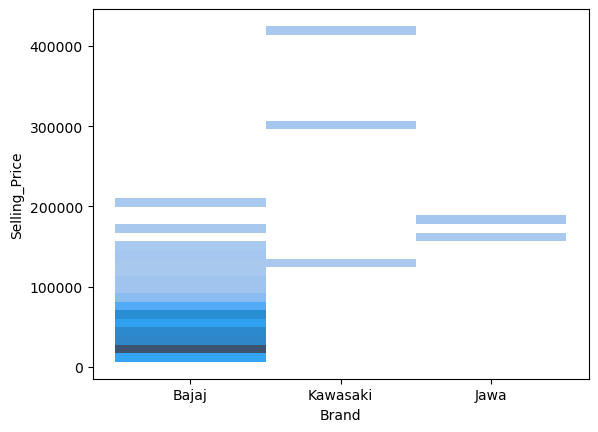

In [30]:
df_bike2 = df_bike[df_bike['Brand'].isin(["TVS	", "Bajaj", "Jawa", "Kawasaki"])]
sns.histplot(data = df_bike2, x = 'Brand', y = 'Selling_Price')
plt.show()

### Тепловая карта

In [94]:
df_bike[(df_bike['Owner']=='1st owner')]

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
5,Bajaj,Bajaj Discover 100,20000,2012,Individual,1st owner,85000,42859.0
...,...,...,...,...,...,...,...,...
1056,Royal,Royal Enfield Electra 5 S,90000,2012,Individual,1st owner,40000,NaN
1057,Hero,Hero Honda Hunk,20000,2010,Individual,1st owner,17000,NaN
1058,Bajaj,Bajaj Pulsar 220 DTS-i,60000,2014,Individual,1st owner,16000,NaN
1059,Hero,Hero Honda CBZ extreme,40000,2009,Individual,1st owner,50000,NaN


In [150]:

df22 = df_bike.groupby(['Brand', 'Year'])['Owner'].count().fillna('0').unstack()
#sns.heatmap(df6, annot = True, fmt = '.3f')

In [152]:
#df22=df22.fillna(0)

In [154]:
df22

Year,1988,1991,1993,1995,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Brand,,,,,,,,,,,,,,,,,,,,,
Activa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
Aprilia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
BMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Bajaj,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,25.0,21.0,17.0,19.0,22.0,28.0,22.0,29.0,15.0,NaN
Benelli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Hero,NaN,NaN,NaN,NaN,1.0,1.0,1.0,4.0,NaN,1.0,...,12.0,18.0,23.0,21.0,18.0,22.0,17.0,17.0,11.0,NaN
Honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,13.0,14.0,27.0,26.0,25.0,34.0,20.0,15.0,NaN
Hyosung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


<Axes: xlabel='Year', ylabel='Brand'>

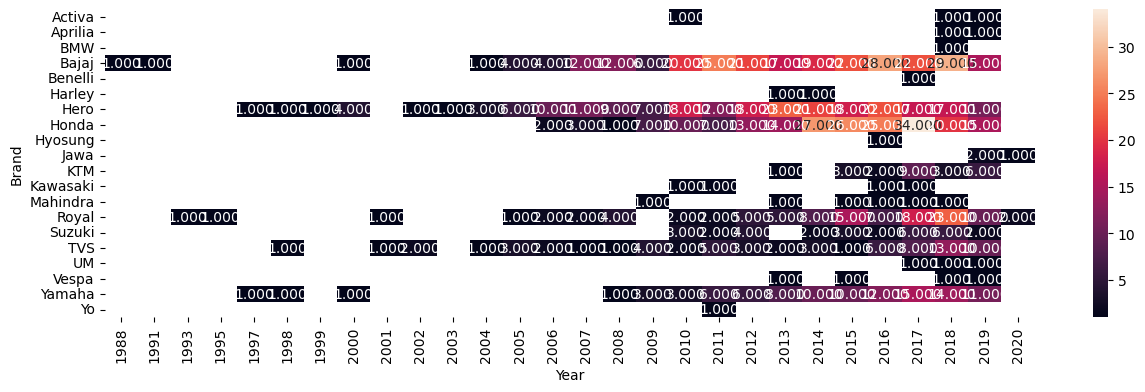

In [158]:
plt.figure(figsize = (15, 4))
sns.heatmap(df22, annot = True, fmt = '.3f')

In [ ]:
# На тепловой карте видно, байки каких брендов по годам выпуска и в каком количесте продаются, что облегчает сотрудникам делать упор на продажу какого года байка.